In [5]:
## Imports
import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model



In [54]:
## Load Data

# Percorso del file HDF5 da cui caricare i dati
load_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques-main/classificator_data.h5"

# Inizializza le liste per contenere i dati
loaded_class_images = []
loaded_class_labels = None
loaded_patients = None

# Apre il file HDF5 in modalità lettura
with h5py.File(load_path, 'r') as hf:
    # Itera su tutti i gruppi nel file HDF5
    for group_name in hf.keys():
        # Controlla se il nome del gruppo inizia con "patient_"
        if group_name.startswith("patient_"):
            group = hf[group_name]
            # Carica le immagini dal dataset 'images' all'interno del gruppo
            loaded_class_images.append(np.array(group['images']))
        elif group_name == "labels":
            # Carica le etichette dal dataset 'labels'
            loaded_class_labels = hf['labels'][:]
        elif group_name == "patients":
            # Carica i numeri dei pazienti dal dataset 'patients'
            loaded_patients = hf['patients'][:]

print(f"Dati caricati da {load_path}")
print(f"Numero di pazienti: {len(loaded_class_images)}")
print(f"Esempio di immagini per paziente: {loaded_class_images[0].shape}")


Dati caricati da /Users/alessiamenozzi/Desktop/ThesisPlaques-main/classificator_data.h5
Numero di pazienti: 124
Esempio di immagini per paziente: (28, 64, 64)


In [50]:
loaded_patients
print(loaded_class_images[i].shape[0])

28


In [46]:
print(loaded_patients[0])
print(loaded_class_images[0].shape)

5
(28, 64, 64)


(3914, 65)
      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      0.737975   0.867578   0.429783        0.0   0.005908   0.251539   
1      0.659856   0.572405   0.265733        0.0   0.030105   0.298956   
2      0.696309   0.449537   0.176878        0.0   0.159551   0.296009   
3      0.615843   0.470112   0.080302        0.0   0.271489   0.442898   
4      0.808108   0.594691   0.090244        0.0   0.184134   0.627366   
...         ...        ...        ...        ...        ...        ...   
3909   0.482673   0.337879   0.223757        0.0   0.491946   0.335521   
3910   0.388288   0.431303   0.376018        0.0   0.639233   0.187535   
3911   0.435429   0.380137   0.355738        0.0   0.526285   0.132511   
3912   0.646840   0.417076   0.289355        0.0   0.259972   0.000000   
3913   0.843895   0.426343   0.235686        0.0   0.228079   0.034381   

      feature_6  feature_7  feature_8  feature_9  ...  feature_55  feature_56  \
0      0.475528    

## prendo le features

In [57]:
# Carica il modello encoder
#encoder = load_model("/Users/alessiamenozzi/Desktop/ThesisPlaques-main/encoder_models/encoder_model64.h5", compile=False)
encoder = load_model("/Users/alessiamenozzi/Desktop/encoder_model16_sigm.h5", compile=False)

# Funzione per ottenere le feature da una singola immagine
def get_features_from_image(image):
    image = image.astype('float32')
    image = image / 255.0
    # Ottieni le feature dall'encoder
    if len(image.shape) == 2:  # Se l'immagine è 64x64
        image = np.expand_dims(image, axis=-1)  # Aggiungi canale se necessario (per immagini in bianco e nero)
    image = np.expand_dims(image, axis=0)  # Aggiungi dimensione batch
    features = encoder.predict(image, verbose=False)
    features = np.squeeze(features)
    #print(features.shape)
    return np.array(features)

# Lista per salvare le feature delle immagini
patients = []

# Ottieni le feature per ogni immagine nella lista

for i in range(len(loaded_class_images)):
    features_list = []
    for img in loaded_class_images[i]:
        features = get_features_from_image(img)
        features_list.append(features)
    fetures_list = np.array(features_list)
    patients.append(features_list)



## creazione dataframe

In [59]:
import pandas as pd

# Supponiamo che loaded_patients contenga le etichette dei pazienti

all_images = []
patient_numbers = []

# Itera su ogni paziente
for patient_idx, patient in enumerate(patients):
    # Ottieni l'etichetta del paziente
    patient_label = loaded_patients[patient_idx]
    
    # Itera su ogni immagine del paziente
    for image_features in patient:
        # Aggiungi le features dell'immagine alla lista delle immagini
        all_images.append(image_features)
        # Aggiungi l'etichetta del paziente alla lista delle etichette
        patient_numbers.append(patient_label)

# Creazione del DataFrame con le immagini come righe e le features come colonne
df = pd.DataFrame(all_images, columns=[f'feature_{i}' for i in range(32)])

# Aggiungi la colonna patient_number
df['patient_number'] = patient_numbers

# Visualizzazione del DataFrame
print(df.shape)
print(df.head())


(3914, 33)
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.471526   0.115964   0.466823   0.580566   0.335485   0.383706   
1   0.629292   0.157862   0.425249   0.527608   0.291099   0.399335   
2   0.721302   0.172588   0.435527   0.465630   0.274758   0.453600   
3   0.761853   0.156653   0.471669   0.455654   0.225315   0.534253   
4   0.760020   0.111538   0.513831   0.412825   0.254333   0.608050   

   feature_6  feature_7  feature_8  feature_9  ...  feature_23  feature_24  \
0   0.331664   0.568534   0.343131   0.198489  ...    0.410481    0.286359   
1   0.331054   0.600148   0.251415   0.190090  ...    0.429107    0.236937   
2   0.362372   0.663614   0.190529   0.154735  ...    0.354562    0.217675   
3   0.349859   0.628115   0.136609   0.127316  ...    0.339585    0.227294   
4   0.308603   0.669233   0.109063   0.123443  ...    0.286124    0.221844   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0    0.361043   

In [56]:
print(df.tail())

      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
3909   0.482673   0.337879   0.223757        0.0   0.491946   0.335521   
3910   0.388288   0.431303   0.376018        0.0   0.639233   0.187535   
3911   0.435429   0.380137   0.355738        0.0   0.526285   0.132511   
3912   0.646840   0.417076   0.289355        0.0   0.259972   0.000000   
3913   0.843895   0.426343   0.235686        0.0   0.228079   0.034381   

      feature_6  feature_7  feature_8  feature_9  ...  feature_55  feature_56  \
3909   0.000000        0.0   0.000000        0.0  ...         0.0    0.483235   
3910   0.141102        0.0   0.000000        0.0  ...         0.0    0.786601   
3911   0.230310        0.0   0.000000        0.0  ...         0.0    0.684629   
3912   0.205328        0.0   0.156197        0.0  ...         0.0    0.419945   
3913   0.240540        0.0   0.290382        0.0  ...         0.0    0.442745   

      feature_57  feature_58  feature_59  feature_60  feature_61  fe

            feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0    1.000000  -0.430351  -0.269983   0.588910  -0.116443   0.076361   
feature_1   -0.430351   1.000000   0.209909  -0.332838   0.157725   0.214728   
feature_2   -0.269983   0.209909   1.000000  -0.165716   0.305425   0.055819   
feature_3    0.588910  -0.332838  -0.165716   1.000000   0.187846  -0.210945   
feature_4   -0.116443   0.157725   0.305425   0.187846   1.000000  -0.193324   
feature_5    0.076361   0.214728   0.055819  -0.210945  -0.193324   1.000000   
feature_6   -0.417186   0.197848   0.045793  -0.354782  -0.260439  -0.083579   
feature_7    0.591867  -0.141672  -0.001367   0.745307   0.257205   0.033896   
feature_8   -0.296220   0.278725   0.378922   0.202765   0.448856  -0.309726   
feature_9   -0.159744   0.674842   0.299678   0.131108   0.226486   0.234411   
feature_10  -0.577400   0.628322   0.161335  -0.636912  -0.211847   0.078940   
feature_11   0.064120   0.406067   0.308

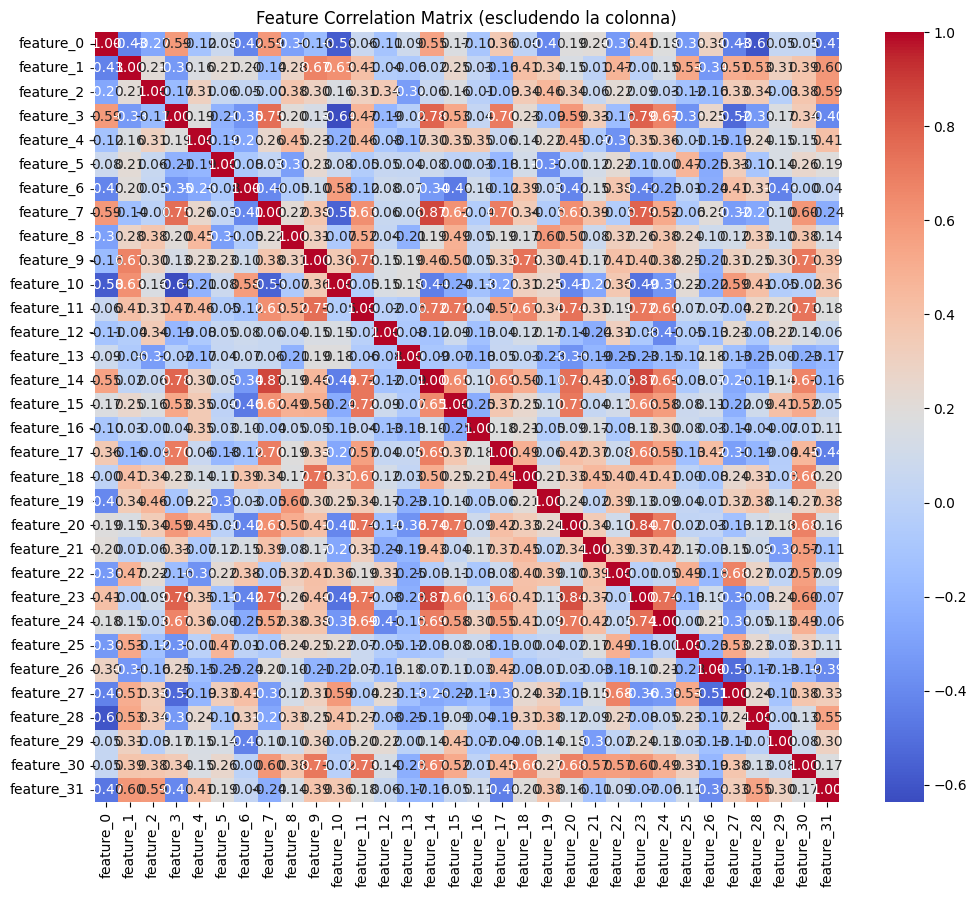

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo di avere già creato il DataFrame 'df' come mostrato prima

# Escludi la colonna che non desideri considerare dalla matrice di correlazione
columns_to_exclude = ['patient_number']
corr_matrix = df.drop(columns=columns_to_exclude).corr()

print(corr_matrix)

# Visualizza la matrice di correlazione usando una heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix (escludendo la colonna)")
plt.show()



Colonne con valori NaN in tutte le loro correlazioni: []


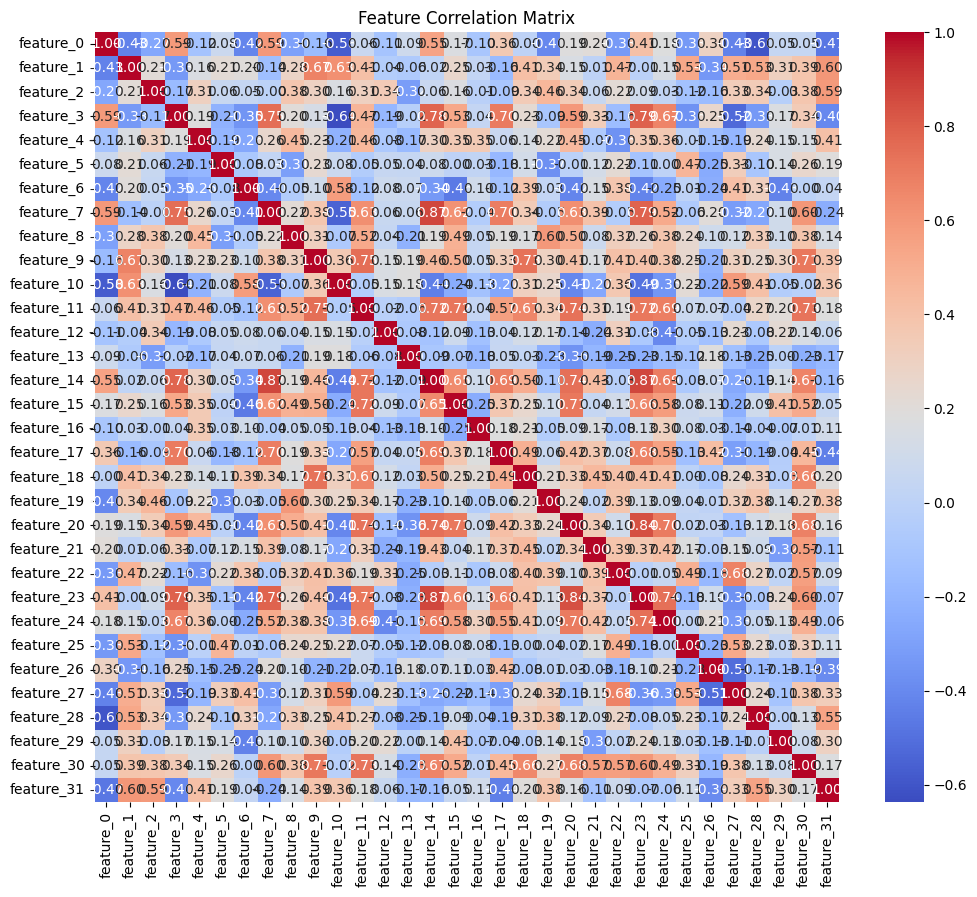

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Trova le colonne che hanno valori NaN in tutte le loro correlazioni
nan_columns_all = corr_matrix.columns[corr_matrix.isna().all()].tolist()

# Stampa le colonne con valori NaN in tutte le loro correlazioni
print("Colonne con valori NaN in tutte le loro correlazioni:", nan_columns_all)

# Se vuoi anche visualizzare la matrice di correlazione con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def filter_highly_correlated_features(df, threshold=0.85):
    columns_to_exclude = ['patient_number']
    newdf= df.drop(columns=columns_to_exclude)
    corr = newdf.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= threshold:
                if columns[j]:
                    columns[j] = False

    selected_columns = newdf.columns[columns]
    return newdf[selected_columns].values  # Restituiamo solo i valori senza trasporre

new_patients = []

new_patient_data = filter_highly_correlated_features(df)  # Applichiamo la funzione al paziente
new_patients.append(new_patient_data)

# Verifichiamo la forma dei nuovi dati
for i, new_patient in enumerate(new_patients):
    print(f"Shape of new data for patient {i}: {new_patient.shape}")

# Se vogliamo trasformare in un DataFrame per ogni paziente (opzionale)
# Questo aiuta a gestire lunghezze diverse
new_patients_df_list = [pd.DataFrame(patient) for patient in new_patients]

# Verifica della struttura dei nuovi dati
print("Example of new features for the first patient:")
print(new_patients_df_list[0].head())


Shape of new data for patient 0: (3914, 30)
Example of new features for the first patient:
         0         1         2         3         4         5         6   \
0  0.471526  0.115964  0.466823  0.580566  0.335485  0.383706  0.331664   
1  0.629292  0.157862  0.425249  0.527608  0.291099  0.399335  0.331054   
2  0.721302  0.172588  0.435527  0.465630  0.274758  0.453600  0.362372   
3  0.761853  0.156653  0.471669  0.455654  0.225315  0.534253  0.349859   
4  0.760020  0.111538  0.513831  0.412825  0.254333  0.608050  0.308603   

         7         8         9   ...        20        21        22        23  \
0  0.568534  0.343131  0.198489  ...  0.494761  0.259834  0.286359  0.361043   
1  0.600148  0.251415  0.190090  ...  0.507778  0.277429  0.236937  0.313938   
2  0.663614  0.190529  0.154735  ...  0.506597  0.222216  0.217675  0.267210   
3  0.628115  0.136609  0.127316  ...  0.516819  0.205258  0.227294  0.215294   
4  0.669233  0.109063  0.123443  ...  0.513288  0.136868  

In [21]:
import pandas as pd

# Carica il file CSV
file_path = "/Users/alessiamenozzi/Desktop/data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193"]

# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

print("Labels:", labels)
print("Number of labels:", len(labels))


Labels: [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
Number of labels: 124


In [35]:
new_patient.shape

(3914, 61)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supponiamo che 'new_patients' contenga le features selezionate e 'labels' le etichette
# Dividiamo i dati in set di addestramento e test
X_train, X_val, y_train, y_val = train_test_split(loaded_patients, np.array(labels), test_size=0.2, random_state=42, shuffle=True, stratify=np.array(labels))
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)

# Addestramento del classificatore Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Valutazione del classificatore
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [99, 124]

In [27]:
np.random.seed(123)
def remove_correlated_features(encoded_features, threshold):
    # Trasforma l'array numpy in un DataFrame
    df = pd.DataFrame(encoded_features)

    # Calcola la matrice di correlazione
    corr_matrix = df.corr().abs()

    # Seleziona il triangolo superiore della matrice di correlazione
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Calcola la somma delle correlazioni per ogni feature
    correlation_sums = upper.sum()

    # Trova le feature con somma delle correlazioni superiore alla soglia
    to_drop = [column for column in correlation_sums.index if correlation_sums[column] > threshold]

    # Stampa le feature rimosse
    print(f"Feature rimosse: {to_drop}")

    # Elimina le feature
    df.drop(df.columns[to_drop], axis=1, inplace=True)

    return df

# Utilizza la funzione sulle tue feature codificate
new_features = remove_correlated_features(encoded_features, soglia)

ModuleNotFoundError: No module named 'sklearn'

In [23]:
import pandas as pd
import numpy as np

def remove_correlated_features(patients_features, threshold):
    # Concatena tutti i vettori di feature in un unico DataFrame
    all_features = np.concatenate(patients_features)
    df = pd.DataFrame(all_features)

    # Calcola la matrice di correlazione
    corr_matrix = df.corr().abs()

    # Seleziona il triangolo superiore della matrice di correlazione
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Calcola la somma delle correlazioni per ogni feature
    correlation_sums = upper.sum()

    # Trova le feature con somma delle correlazioni superiore alla soglia
    to_drop = [column for column in correlation_sums.index if correlation_sums[column] > threshold]

    # Stampa le feature rimosse
    print(f"Feature rimosse: {to_drop}")

    # Elimina le feature
    df.drop(df.columns[to_drop], axis=1, inplace=True)

    return df.values

# Utilizza la funzione sulle tue feature codificate
new_features = remove_correlated_features(patients_features, soglia)


NameError: name 'patients_features' is not defined